In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# The Keras functional API

 ## Coding tutorials
 #### [1. Multiple inputs and outputs](#coding_tutorial_1)
 #### [2. Tensors and Variables](#coding_tutorial_2)
 #### [3. Accessing model layers](#coding_tutorial_3)
 #### [4. Freezing layers](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Multiple inputs and outputs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- decision 1: Inflammation of urinary bladder : yes/no
- decision 2: Nephritis of renal pelvis origin : yes/no

#### Import the data

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1CDPQSqpI7OjNIgOERWaI-BlQMI6vjzb9

You should store this file in Drive for use in this Colab notebook.

#### Load the data

In [ ]:
# Run this cell to connect to your Drive folder

#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_dat = pd.read_csv('/content/diagnosis.csv')
dataset = pd_dat.values

In [ ]:
pd_dat.head()

0  1  2  3  4  5  6  7
0  35.5  0  1  0  0  0  0  0
1  35.9  0  0  1  1  1  1  0
2  35.9  0  1  0  0  0  0  0
3  36.0  0  0  1  1  1  1  0
4  36.0  0  1  0  0  0  0  0

In [ ]:
# Build train and test data splits

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [ ]:
np.transpose(X_train)

array([[37.8, 36.9, 40.7, 41.5, 39.4, 37.3, 36.9, 41.2, 40.7, 37. , 36.7,
        35.5, 37.6, 38.3, 41.1, 40.8, 40.7, 41. , 40.2, 37.7, 37.9, 36.8,
        37.2, 37.4, 39. , 41. , 36. , 36.2, 40.9, 37.9, 36.2, 35.9, 41.5,
        38.5, 37.9, 36.6, 40.9, 41.3, 37. , 37.5, 41.1, 40. , 37.8, 37.1,
        37. , 40.4, 37. , 35.9, 40. , 37.6, 36. , 36.6, 40. , 38.1, 38.7,
        40. , 39.7, 40. , 40.7, 40.2, 41.1, 37.5, 41.1, 41.4, 36.6, 36.7,
        37.7, 41.1, 37. , 36.3, 41.2, 37.1, 37. , 37.5, 40. , 36. , 37.7,
        38. , 37.4, 37.3],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ,
         0. ,  0. ,  0. ,  1. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,
         1. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0.

In [ ]:
np.transpose(X_train)[0]

array([37.8, 36.9, 40.7, 41.5, 39.4, 37.3, 36.9, 41.2, 40.7, 37. , 36.7,
       35.5, 37.6, 38.3, 41.1, 40.8, 40.7, 41. , 40.2, 37.7, 37.9, 36.8,
       37.2, 37.4, 39. , 41. , 36. , 36.2, 40.9, 37.9, 36.2, 35.9, 41.5,
       38.5, 37.9, 36.6, 40.9, 41.3, 37. , 37.5, 41.1, 40. , 37.8, 37.1,
       37. , 40.4, 37. , 35.9, 40. , 37.6, 36. , 36.6, 40. , 38.1, 38.7,
       40. , 39.7, 40. , 40.7, 40.2, 41.1, 37.5, 41.1, 41.4, 36.6, 36.7,
       37.7, 41.1, 37. , 36.3, 41.2, 37.1, 37. , 37.5, 40. , 36. , 37.7,
       38. , 37.4, 37.3])

In [ ]:
Y_train

array([[0., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.

In [ ]:
# Assign training and testing inputs/outputs

temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

#### Build the model

In [ ]:
Temperature of patient : 35C-42C
Occurrence of nausea : yes/no
Lumbar pain : yes/no
Urine pushing (continuous need for urination) : yes/no
Micturition pains : yes/no
Burning of urethra, itch, swelling of urethra outlet : yes/no

In [ ]:
# Build the input layers
from tensorflow.keras import Input,layers

shape_inputs=(1,)             #(none,1)                           
temperature=Input(shape=shape_inputs,name='temp')
nausea_occurence=Input(shape=shape_inputs,name='nocc')
lumbar_pain=Input(shape=shape_inputs,name='lumbp')
urine_pushing=Input(shape=shape_inputs,name='up')
micturition_pains=Input(shape=shape_inputs,name='mict')
bis=Input(shape=shape_inputs,name='bis')

In [ ]:
# Create a list of all the inputs

list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [ ]:
# Merge all input features into a single large vector

x=layers.concatenate(list_inputs)
x

<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'concatenate_1')>

In [ ]:
# Use a logistic regression classifier for disease prediction

inflammation_pred=layers.Dense(1,activation='sigmoid',name='inflam')(x)
nephritis_pred=layers.Dense(1,activation='sigmoid',name='nephr')(x)

In [ ]:
# Create a list of all the outputs

list_outputs = [inflammation_pred, nephritis_pred]

In [ ]:
# Create the model object
from tensorflow.keras.models import  Model

model=Model(inputs=list_inputs,outputs=list_outputs)

#### Plot the model

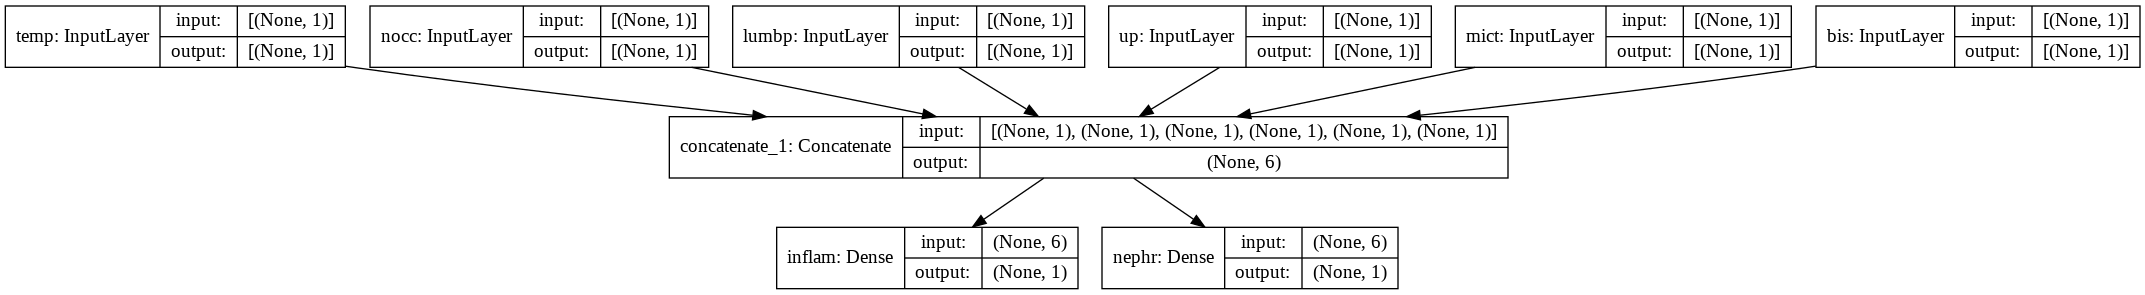

In [ ]:
# Display the multiple input/output model

tf.keras.utils.plot_model(model,'image.png',show_shapes=True)

#### Compile the model

In [ ]:
# Compile the model

model.compile(tf.keras.optimizers.RMSprop(1e-3),
              loss=['binary_crossentropy','binary_crossentropy'],
              metrics=[['acc'],['mse']],
              loss_weights=[1.0,0.2])

In [ ]:
#Another Way 

# model.compile(tf.keras.optimizers.RMSprop(1e-3),
#               loss={'infam':'binary_crossentropy',
#               "nephr":'binary_crossentropy'},
#               metrics={'infam':['acc'],'nephr':['mse']}
#               loss_weights=[1.0,0.2])


#### Fit the model 

In [ ]:
# Define training inputs and outputs

# inputs_train = {'temp': temp_train, 'nocc': nocc_train, 'lumbp': lumbp_train,
#                 'up': up_train, 'mict': mict_train, 'bis': bis_train}

# outputs_train = {'inflam': inflam_train, 'nephr': nephr_train}


inputs_train=[temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train]
outputs_train=[inflam_train, nephr_train]

In [ ]:
# Train the model
history=model.fit(inputs_train,outputs_train,epochs=3000,batch_size=128,verbose=False)


#### Plot the learning curves

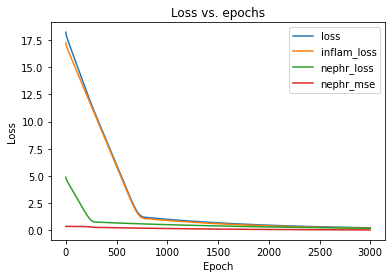

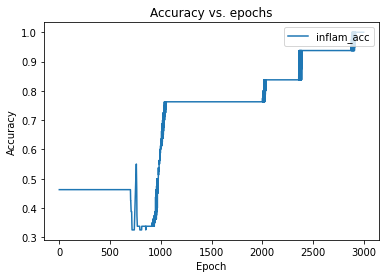

In [ ]:
# Plot the training accuracy

acc_keys = [k for k in history.history.keys() if k in ('inflam_acc', 'nephr_acc')] 
loss_keys = [k for k in history.history.keys() if not k in acc_keys]

for k, v in history.history.items():
    if k in acc_keys:
        plt.figure(1)
        plt.plot(v)
    else:
        plt.figure(2)
        plt.plot(v)

plt.figure(1)
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(acc_keys, loc='upper right')

plt.figure(2)
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loss_keys, loc='upper right')

plt.show()

In [ ]:
# Evaluate the model

model.evaluate([temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test],[inflam_test, nephr_test],verbose=2)

2/2 - 0s - loss: 0.3680 - inflam_loss: 0.3177 - nephr_loss: 0.2515 - inflam_acc: 1.0000 - nephr_mse: 0.0673


[0.3679526448249817,
 0.31765276193618774,
 0.2514995038509369,
 1.0,
 0.0673058032989502]

***
<a id="coding_tutorial_2"></a>
## Tensors and Variables

LearningRate,Weights are all **tf.variable** because they can be changed during_training

In [73]:
from tensorflow.keras.models import Sequential ,Model

model=Sequential([
      tf.keras.layers.Dense(1,input_shape=(4,),name='Dense_')
])
model.summary()
model.weights

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_ (Dense)               (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


[<tf.Variable 'Dense_/kernel:0' shape=(4, 1) dtype=float32, numpy=
 array([[ 0.67204034],
        [-0.7683165 ],
        [-1.0270556 ],
        [ 0.9264715 ]], dtype=float32)>,
 <tf.Variable 'Dense_/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [74]:
import numpy as np

#### Create Variable objects

In [75]:
# Create Variable objects of different type with tf.Variable

strings = tf.Variable(["Hello world!"], tf.string)
floats  = tf.Variable([3.14159, 2.71828], tf.float64)
ints = tf.Variable([1, 2, 3], tf.int32)
complexs = tf.Variable([25.9 - 7.39j, 1.23 - 4.91j], tf.complex128)

In [76]:
strings

<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'Hello world!'], dtype=object)>

In [78]:
# Initialise a Variable value
tf.Variable(tf.constant(1.2,shape=(5,6)))


<tf.Variable 'Variable:0' shape=(5, 6) dtype=float32, numpy=
array([[1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.2, 1.2, 1.2, 1.2, 1.2, 1.2]], dtype=float32)>

#### Use and modify Variable values

In [84]:
# Use the value of a Variable

v = tf.Variable(0.0)
w = v + 1  # w is a tf.Tensor which is computed based on the value of v.
print(v)
print(w)
print(type(w))


<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>
tf.Tensor(1.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [85]:
# Increment the value of a Variable

v.assign_add(2.0)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>


In [91]:
tf.Variable([1,2,3]).assign_add([2,2,2])               #When adding shape and type should be same

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 4, 5], dtype=int32)>

In [92]:
# Decrement the value of a Variable
v.assign_sub(2)


<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.0>

# **TensorObjects**

In [ ]:
inputs=tf.keras.layers.Input(shape=(5,))
h=tf.keras.layers.Dense(5)(inputs)
outputs=tf.keras.layers.Dense(20)(h)
model=Model(inputs=inputs,outputs=outputs)
print(inputs)
print(outputs)
print()

print(model.input)         #attributes of model
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name='input_12'), name='input_12', description="created by layer 'input_12'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), name='dense_24/BiasAdd:0', description="created by layer 'dense_24'")

KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name='input_12'), name='input_12', description="created by layer 'input_12'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), name='dense_24/BiasAdd:0', description="created by layer 'dense_24'")


#### Create Tensor objects

Create a constant tensor and print its type as well as its shape:

In [93]:
# Create a constant Tensor

x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print("dtype:", x.dtype)
print("shape:", x.shape)

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
dtype: <dtype: 'int32'>
shape: (3, 3)


In [94]:
# Obtain the value as a numpy array

x.numpy()

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int32)

In [96]:
# Create a Tensor of type float32
x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]],dtype=tf.float32)
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)>

In [99]:
# Create coefficients

coeffs = np.arange(16)

In [102]:
# Initialise shapes
shape1=[8,2]
shape2=[4,4]
shape3=[2,2,2,2]

In [103]:
# Create Tensors of different shape

a = tf.constant(coeffs, shape=shape1)
print("\n a:\n ", a)

b = tf.constant(coeffs, shape=shape2)
print("\n b:\n ", b)

c = tf.constant(coeffs, shape=shape3)
print("\n c:\n ", c)


 a:
  tf.Tensor(
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]], shape=(8, 2), dtype=int64)

 b:
  tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]], shape=(4, 4), dtype=int64)

 c:
  tf.Tensor(
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]], shape=(2, 2, 2, 2), dtype=int64)


#### Useful Tensor operations

In [105]:
# Create a constant Tensor

t = tf.constant(np.arange(80), shape=[5,2,8])
print(t)

tf.Tensor(
[[[ 0  1  2  3  4  5  6  7]
  [ 8  9 10 11 12 13 14 15]]

 [[16 17 18 19 20 21 22 23]
  [24 25 26 27 28 29 30 31]]

 [[32 33 34 35 36 37 38 39]
  [40 41 42 43 44 45 46 47]]

 [[48 49 50 51 52 53 54 55]
  [56 57 58 59 60 61 62 63]]

 [[64 65 66 67 68 69 70 71]
  [72 73 74 75 76 77 78 79]]], shape=(5, 2, 8), dtype=int64)


In [106]:
# Get the rank of a Tensor
rank=tf.rank(t)


In [107]:
# Display the rank

print("rank: ", rank)

rank:  tf.Tensor(3, shape=(), dtype=int32)


In [108]:
# Reshape a Tensor
t2=tf.reshape(t,[8,10])


In [109]:
# Display the new shape

print("t2.shape: ", t2.shape)

t2.shape:  (8, 10)


In [110]:
# Create ones, zeros, identity and constant Tensors
ones=tf.ones([3,4])
zeros=tf.zeros([2,4])
eye=tf.eye(3)
tensor7=tf.constant(7.0,shape=[2,2])

In [111]:
# Display the created tensors

print("\n Ones:\n ", ones)
print("\n Zeros:\n ", zeros)
print("\n Identity:\n ", eye)
print("\n Tensor filled with 7: ", tensor7)


 Ones:
  tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)

 Zeros:
  tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(2, 4), dtype=float32)

 Identity:
  tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)

 Tensor filled with 7:  tf.Tensor(
[[7. 7.]
 [7. 7.]], shape=(2, 2), dtype=float32)


In [113]:
# Create a ones Tensor and a zeros Tensor

t1 = tf.ones(shape=(2, 2))
t2 = tf.zeros(shape=(2, 2))
print(t1)
print(t2)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


In [115]:
# Concatentate two Tensors
concat0=tf.concat([t1,t2],0)
concat1=tf.concat([t1,t2],1)


In [116]:
# Display the concatenated tensors

print(concat0)
print(concat1)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]], shape=(4, 2), dtype=float32)
tf.Tensor(
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [117]:
# Create a constant Tensor

t = tf.constant(np.arange(24), shape=(3, 2, 4))
print("\n t shape: ", t.shape)


 t shape:  (3, 2, 4)


In [118]:
# Expanding the rank of Tensors
t1=tf.expand_dims(t,0)
t2=tf.expand_dims(t,1)
t3=tf.expand_dims(t,3)

In [119]:
# Display the shapes after tf.expand_dims

print("\n After expanding dims:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After expanding dims:
 t1 shape:  (1, 3, 2, 4) 
 t2 shape:  (3, 1, 2, 4) 
 t3 shape:  (3, 2, 4, 1)


In [120]:
# Squeezing redundant dimensions

t1=tf.squeeze(t1,0)
t2=tf.squeeze(t2,1)
t3=tf.squeeze(t3,3)

In [121]:
# Display the shapes after tf.squeeze

print("\n After squeezing:\n t1 shape: ", t1.shape, "\n t2 shape: ", t2.shape, "\n t3 shape: ", t3.shape)


 After squeezing:
 t1 shape:  (3, 2, 4) 
 t2 shape:  (3, 2, 4) 
 t3 shape:  (3, 2, 4)


In [122]:
# Slicing a Tensor
x=tf.constant([1,2,3,2,4,5,6,7])

x[:3]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

#### Doing maths with Tensors

In [126]:
# Create two constant Tensors

c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])
print(c)
print(d)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [0. 1.]], shape=(2, 2), dtype=float32)


In [127]:
# Matrix multiplication

matmul_cd=tf.matmul(c,d)

In [128]:
# Display the result

print("\n tf.matmul(c,d):\n", matmul_cd)


 tf.matmul(c,d):
 tf.Tensor(
[[1. 3.]
 [3. 7.]], shape=(2, 2), dtype=float32)


In [129]:
# Elementwise operations
c_times_d=c*d
c_plus_d=c+d
c_minus_d=c-d
c_div_c=c/c


In [130]:
# Display the results

print("\n c*d:\n", c_times_d)
print("\n c+d:\n", c_plus_d)
print("\n c-d:\n", c_minus_d)
print("\n c/c:\n", c_div_c)


 c*d:
 tf.Tensor(
[[1. 2.]
 [0. 4.]], shape=(2, 2), dtype=float32)

 c+d:
 tf.Tensor(
[[2. 3.]
 [3. 5.]], shape=(2, 2), dtype=float32)

 c-d:
 tf.Tensor(
[[0. 1.]
 [3. 3.]], shape=(2, 2), dtype=float32)

 c/c:
 tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [140]:
# Create Tensors

a = tf.constant([[2, 3], [3, 3]])
b = tf.constant([[8, 7], [2, 3]])
x = tf.constant([[-6.89 + 1.78j], [-2.54 + 2.15j]])
print(a)
print(b)
print(x)

tf.Tensor(
[[2 3]
 [3 3]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[8 7]
 [2 3]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[-6.89+1.78j]
 [-2.54+2.15j]], shape=(2, 1), dtype=complex128)


In [135]:
# Absolute value of a Tensor

absx=tf.abs(x)

In [138]:
# Power of a Tensor
powab=tf.pow(a,b)
powaa=tf.pow(a,a)

In [139]:
# Display the results

print("\n ", absx)
print("\n ", powab)
print("\n ", powaa)


  tf.Tensor(
[[7.11621388]
 [3.32777704]], shape=(2, 1), dtype=float64)

  tf.Tensor(
[[ 256 2187]
 [   9   27]], shape=(2, 2), dtype=int32)

  tf.Tensor(
[[ 4 27]
 [27 27]], shape=(2, 2), dtype=int32)


#### Randomly sampled constant tensors

In [142]:
# Create a Tensor with samples from a Normal distribution

tn=tf.random.normal(shape=(2,2),mean=0,stddev=1.0)
tn

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1.0869578, -0.7174208],
       [-2.038586 , -0.260143 ]], dtype=float32)>

In [144]:
# Create a Tensor with samples from a Uniform distribution
tu=tf.random.uniform(shape=(2,2),minval=0,maxval=10)
tu

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3.286649 , 2.1120703],
       [0.4236722, 5.7433653]], dtype=float32)>

In [149]:
# Create a Tensor with samples from a Poisson distribution

tp=tf.random.poisson(shape=(2,3),lam=5 )
tp

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[6., 4., 6.],
       [9., 6., 7.]], dtype=float32)>

In [151]:
# More maths operations

d = tf.square(tn)
e = tf.exp(d)
f = tf.cos(c)

print(d)
print(e)
print(f)

tf.Tensor(
[[1.1814773  0.5146926 ]
 [4.1558323  0.06767438]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 3.2591856  1.6731241]
 [63.805046   1.0700169]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 0.5403023  -0.41614684]
 [-0.9899925  -0.6536436 ]], shape=(2, 2), dtype=float32)


***
<a id="coding_tutorial_3"></a>
## Accessing model layers

In [152]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the pre-trained model

In this section, we aim to demonstrate accessing layer attributes within a model.

Let's get started by loading the `VGG19` pre-trained model from the `keras.applications` library, which is a very deep network trained on more than a million images from the ImageNet database. The network is trained to classify images into 1000 object categories.

In [154]:
# Load the VGG19 model
from tensorflow.keras.applications import VGG19
vgg_model=VGG19()

574717952/574710816 [==============================] - 3s 0us/step


**for every model we create model.input and model.output is always there**

**model.input/layer.input** will throw input_tensor

**model.output/layer.output** will throw output_tensor

In [155]:
# Get the inputs, layers and display the summary

vgg_input = vgg_model.input
vgg_layers = vgg_model.layers
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [156]:
vgg_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_13')>

In [160]:
print(len(vgg_layers))
vgg_layers

26


#### Build a model to access the layer outputs

In [ ]:
from tensorflow.keras.models import Model

In [162]:
# Build a model that returns the layer outputs

layer_outputs=[layer.output for layer in vgg_layers]
layer_outputs

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_13')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv4')>

In [163]:
# Will give output of each layer
features=Model(inputs=vgg_input,outputs=layer_outputs)

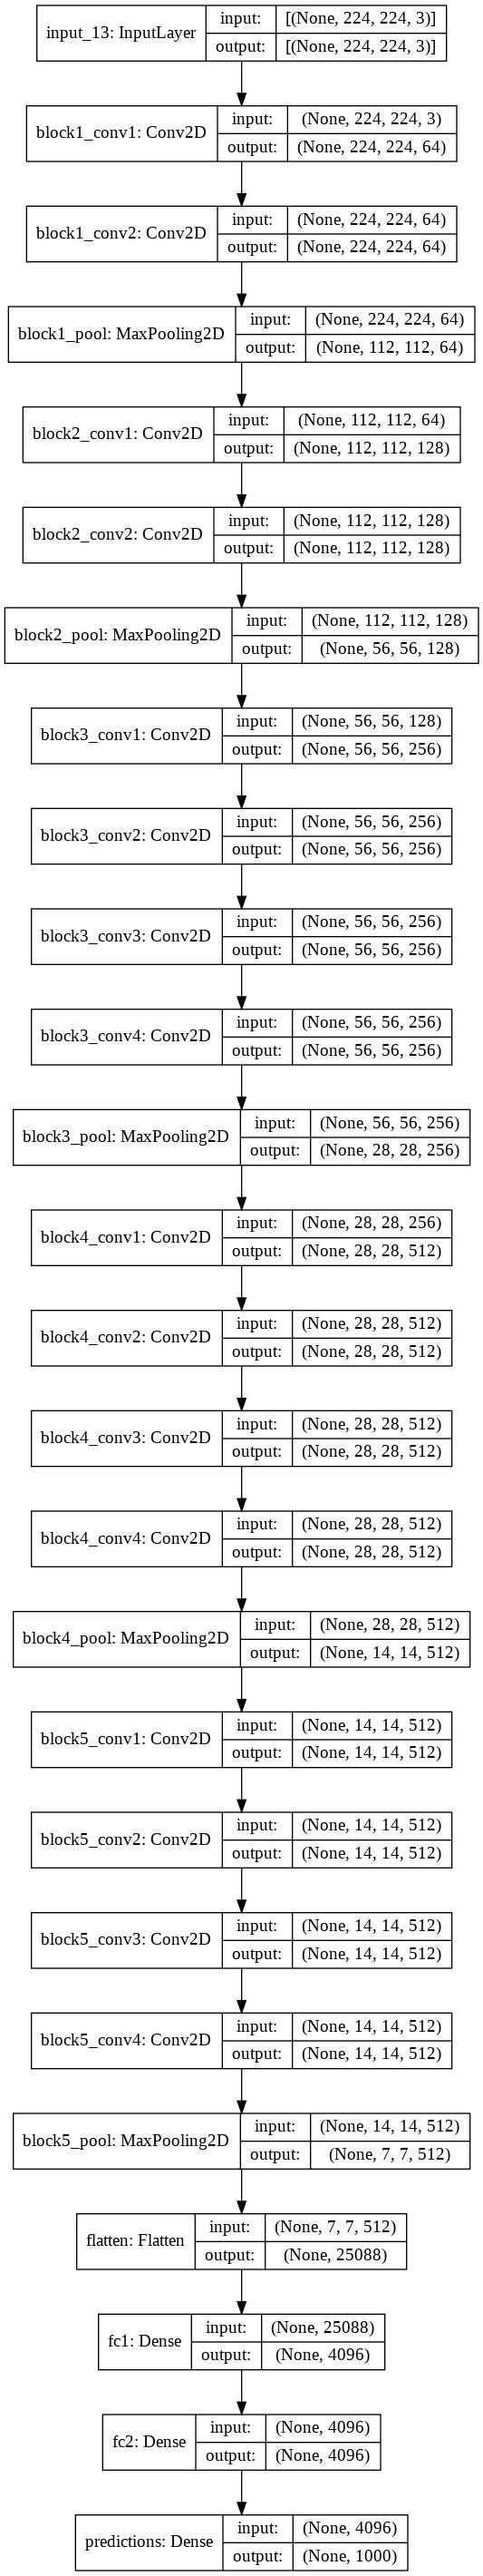

In [164]:
# Plot the model
tf.keras.utils.plot_model(features,'kk.png',show_shapes=True)


In [171]:
# Test the model on a random input

img=np.random.random((1,224,224,3)).astype('float32')
extracted_features=features(img)
print(len(extracted_features))
extracted_features[25]             #features of last layers(prediction)

26


<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[1.89209488e-04, 1.35058921e-03, 6.79087709e-04, 1.64519250e-03,
        2.32652435e-03, 2.03767605e-03, 8.08194466e-03, 1.73870139e-04,
        2.63297581e-04, 2.25717682e-04, 6.63658429e-04, 2.90915690e-04,
        4.00182704e-04, 8.54832237e-04, 3.52861010e-04, 3.38889397e-04,
        7.12511071e-04, 3.86044005e-04, 7.15066330e-04, 1.08650769e-03,
        1.49930618e-03, 9.23541142e-04, 6.78081415e-04, 5.44103503e-04,
        1.38410862e-04, 2.67663971e-04, 1.20646157e-03, 1.18699030e-03,
        2.97426683e-04, 4.81488463e-03, 3.96472664e-04, 4.69706109e-04,
        4.73106775e-04, 1.49252266e-03, 9.84694343e-04, 5.52587269e-04,
        1.33523287e-03, 4.13917878e-04, 2.66316929e-03, 2.91132717e-04,
        8.28928954e-04, 7.28690764e-04, 1.09476247e-03, 5.80100052e-04,
        9.34156240e-04, 1.98506867e-03, 1.01222855e-03, 7.32154353e-04,
        5.28343313e-04, 5.59347915e-04, 9.46848770e-04, 3.25269735e-04,
        2.882

#### Load the 'cool cat' picture

In Zambia’s South Luangwa National Park, a photographer had been watching a pride of lions while they slept off a feast from a buffalo kill. When this female walked away, he anticipated that she might be going for a drink and so he positioned his vehicle on the opposite side of the waterhole. The `cool cat` picture is one of the highly commended 2018 Image from Wildlife Photographer of the Year.

#### Import the picture

The dataset required for this tutorial can be downloaded from the following link:

https://drive.google.com/open?id=1myXpP8QFvhATqg0bPYhCpVS48_OgAC0L

You should store this file in Drive for use in this Colab notebook.

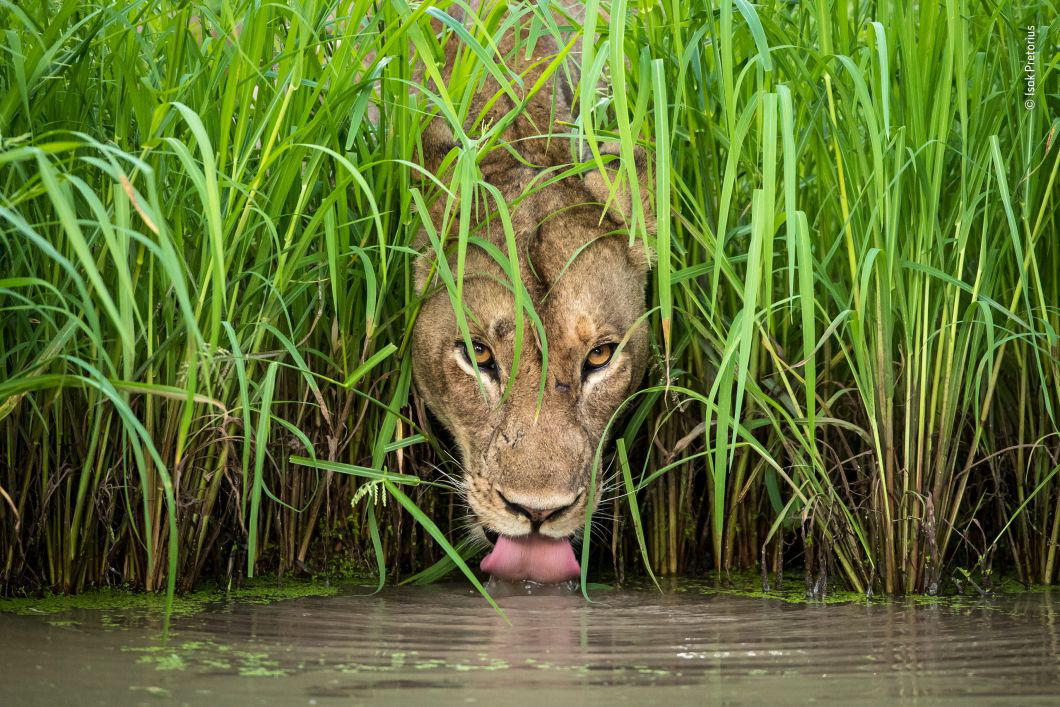

In [172]:
# Display the original image

import IPython.display as display
from PIL import Image

display.display(Image.open('/content/cool_cat.jpg'))

#### Visualise network features from the input image

In [174]:
# Preprocess the image

from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image

img_path = '/content/cool_cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [176]:
# Extract the features
extracted_features=features(x)
extracted_features[0]

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[  10.060997 ,   45.221    ,   -9.68     ],
         [ -10.939003 ,   56.221    ,   -3.6800003],
         [ -58.939003 ,   15.221001 ,  -35.68     ],
         ...,
         [ -45.939003 ,   53.221    ,  -11.68     ],
         [ -94.939    ,   15.221001 ,  -41.68     ],
         [ -89.939    ,   14.221001 ,  -41.68     ]],

        [[ -35.939003 ,   42.221    ,  -13.68     ],
         [  15.060997 ,   57.221    ,    1.3199997],
         [  -9.939003 ,   49.221    ,   -9.68     ],
         ...,
         [ -53.939003 ,   44.221    ,  -18.68     ],
         [ -66.939    ,   31.221    ,  -25.68     ],
         [-103.939    ,   -3.7789993,  -57.68     ]],

        [[-102.939    ,   -6.7789993,  -59.68     ],
         [ -43.939003 ,   22.221    ,  -35.68     ],
         [ -10.939003 ,   52.221    ,  -12.68     ],
         ...,
         [ -72.939    ,   40.221    ,  -18.68     ],
         [ -52.939003 ,   52.221    ,   -7.68000


 f1.shape:  (1, 224, 224, 3)
(224, 224, 3)


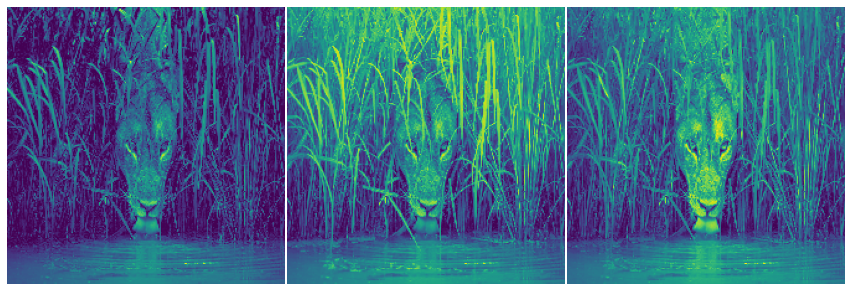

In [183]:
# Visualise the input channels
f1=extracted_features[0]
print('\n f1.shape: ',f1.shape)

imgs=f1[0,:,:,:]
print(imgs.shape)
plt.figure(figsize=(15,15))
for n in range(3):
  ax=plt.subplot(1,3,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')

plt.subplots_adjust(wspace=0.01,hspace=0.01)  


 f1.shape:  (1, 224, 224, 64)
(224, 224, 64)


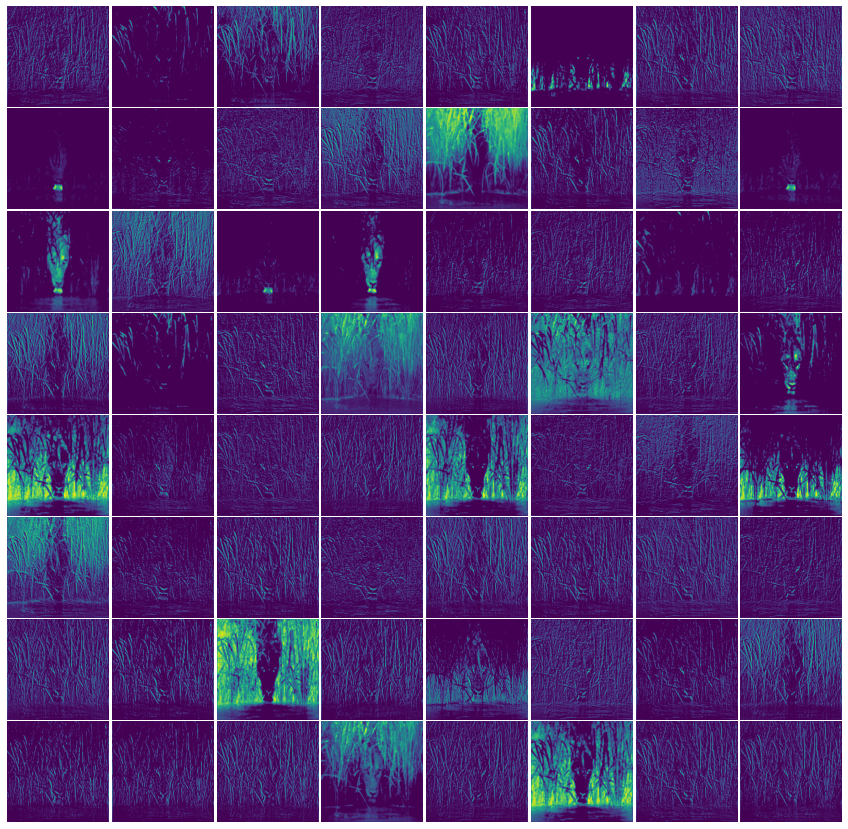

In [187]:
# Visualise some features in the first hidden layer
# Visualise the input channels
f2=extracted_features[1]
print('\n f1.shape: ',f2.shape)

imgs=f2[0,:,:,:]
print(imgs.shape)
plt.figure(figsize=(15,15))
for n in range(64):
  ax=plt.subplot(8,8,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')

plt.subplots_adjust(wspace=0.01,hspace=0.01)  


 f4.shape:  (1, 112, 112, 128)
(112, 112, 128)


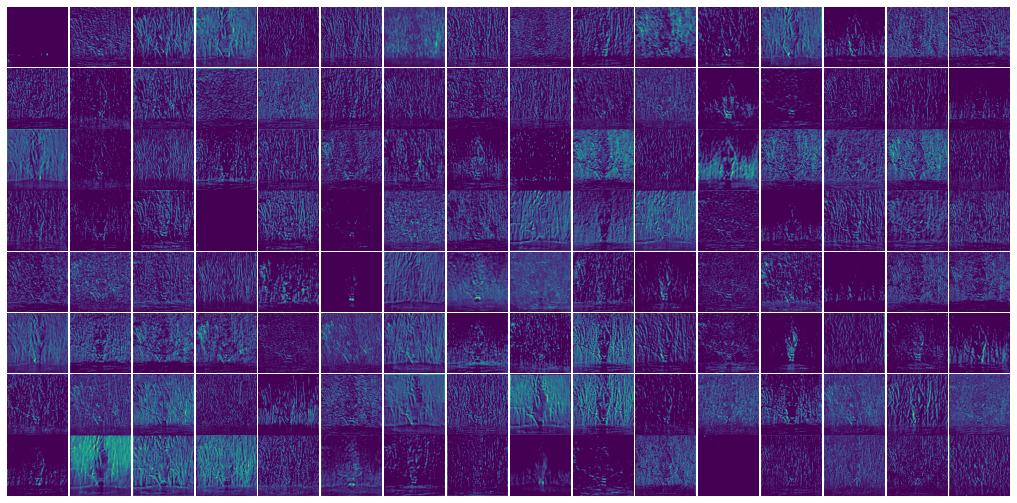

In [190]:
# Visualise some features in the  hidden layer
# Visualise the input channels
f4=extracted_features[4]
print('\n f4.shape: ',f4.shape)

imgs=f4[0,:,:,:]
print(imgs.shape)
plt.figure(figsize=(18,18))
for n in range(128):
  ax=plt.subplot(16,16,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')

plt.subplots_adjust(wspace=0.01,hspace=0.01)  

In [191]:
# Build a model to extract features by layer name
features.layers


In [197]:
#Want to extract a particular layer by its name
print(features.get_layer('block4_conv1').input)
print(features.get_layer('block4_conv1').output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 256), dtype=tf.float32, name=None), name='block3_pool/MaxPool:0', description="created by layer 'block3_pool'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 512), dtype=tf.float32, name=None), name='block4_conv1/Relu:0', description="created by layer 'block4_conv1'")


In [204]:
print(features.get_layer('block1_pool').input)
print(features.get_layer('block1_pool').output)

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 64), dtype=tf.float32, name=None), name='block1_conv2/Relu:0', description="created by layer 'block1_conv2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 64), dtype=tf.float32, name=None), name='block1_pool/MaxPool:0', description="created by layer 'block1_pool'")


In [203]:
# Build a model to extract features by layer name

extracted_features_block1_pool=Model(inputs=features.input,outputs=features.get_layer('block1_pool').output)
block1_pool_features=extracted_features_block1_pool(x)

In [205]:
# Visualise some features from the extracted layer output

imgs=block1_pool_features[0,:,:,:]
print(imgs.shape)
plt.figure(figsize=(18,18))
for n in range(64):
  ax=plt.subplot(8,8,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')

plt.subplots_adjust(wspace=0.01,hspace=0.01)  


Output hidden; open in https://colab.research.google.com to view.

In [206]:
# Extract features from a layer deeper in the network

extracted_features_block5_conv4=Model(inputs=features.input,outputs=features.get_layer('block5_conv4').output)
block1_conv4_features=extracted_features_block5_conv4.predict(x)

(14, 14, 512)


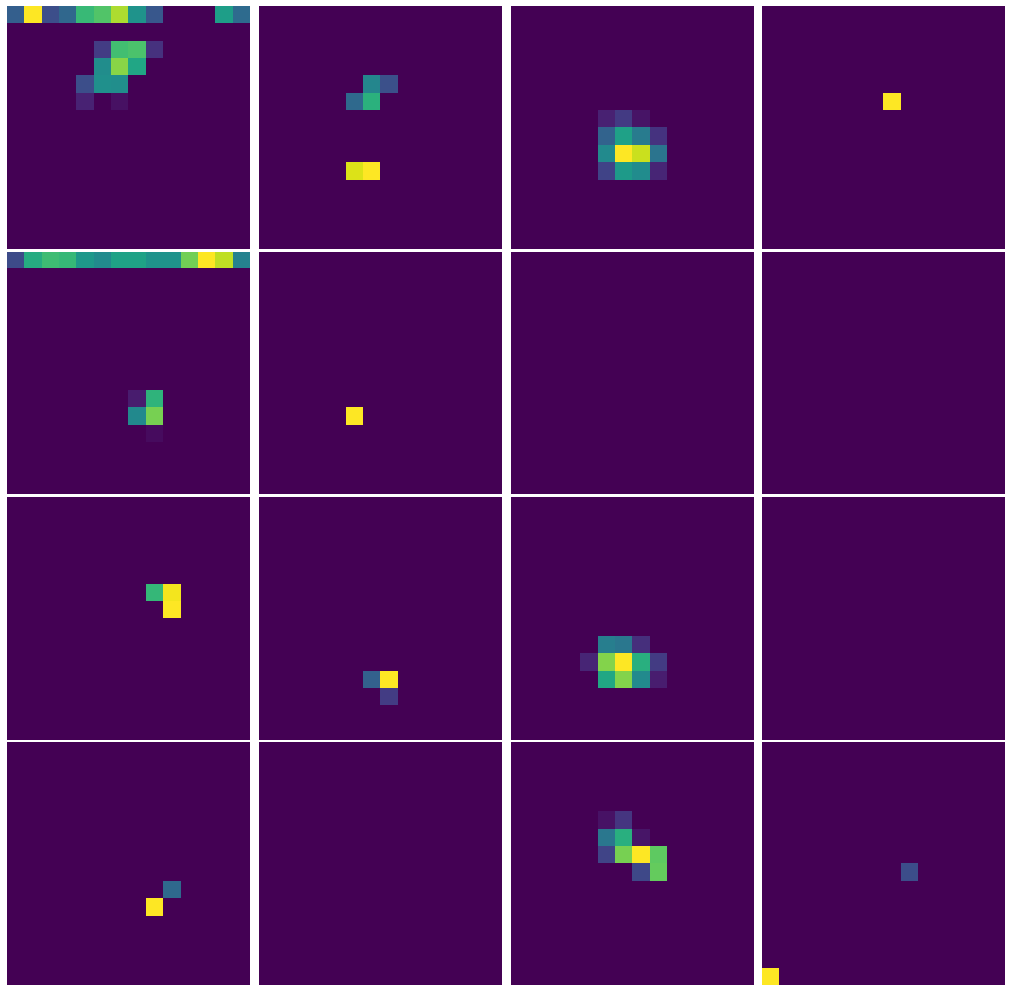

In [210]:
# Visualise some features from the extracted layer output


imgs=block1_conv4_features[0,:,:,:]
print(imgs.shape)
plt.figure(figsize=(18,18))
for n in range(16):
  ax=plt.subplot(4,4,n+1)
  plt.imshow(imgs[:,:,n])
  plt.axis('off')

plt.subplots_adjust(wspace=0.01,hspace=0.01)  

***
<a id="coding_tutorial_4"></a>
## Freezing layers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Build the model

In [2]:
# Build a small Sequential model

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones'),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])

In [3]:
# Display the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 12        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


#### Examine the weight matrix variation over training

In [4]:
def get_weights(model):
  return [e.weights[0].numpy() for e in model.layers ]

def get_biases(model):
  return [e.weights[1].numpy() for e in model.layers ]

def plot_delta_weights(wo_layers,w1_layers,bo_layers,b1_layers):
 plt.figure(figsize=(8,8))
 for n in range(3):
    delta_l = w1_layers[n] - wo_layers[n]
    print('Layer '+str(n)+': bias variation: ', np.linalg.norm(b1_layers[n] - bo_layers[n]))
    ax = plt.subplot(1,3,n+1)
    plt.imshow(delta_l)
    plt.title('Layer '+str(n))
    plt.axis('off')
 plt.colorbar()
 plt.suptitle('Weight matrices variation');

In [5]:
# Retrieve the weights and biases  before training
wo_layers=get_weights(model)
bo_layers=get_biases(model)


In [6]:
# Construct a synthetic dataset

x_train = np.random.random((100, 4))
y_train = x_train

x_test = np.random.random((20, 4))
y_test = x_test

In [7]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [8]:
# Retrieve weights and biases after training

w1_layers=get_weights(model)
b1_layers=get_biases(model)


Layer 0: bias variation:  0.123080865
Layer 1: bias variation:  0.0815214
Layer 2: bias variation:  0.12749615


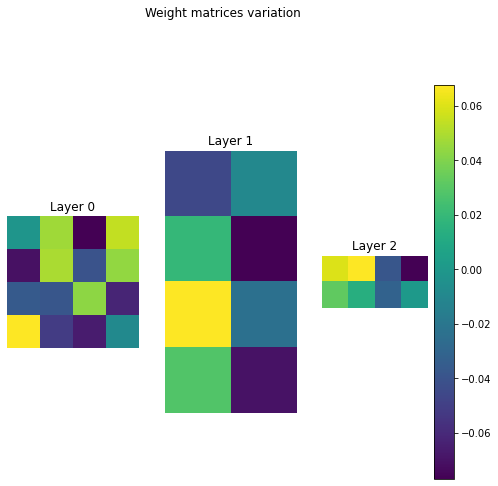

In [9]:
# Plot the variation

plot_delta_weights(wo_layers,w1_layers,bo_layers,b1_layers)

#### Freeze layers at build time

In [10]:
# Count the trainable and non trainable variables before the freezing

n_trainable_variables=len(model.trainable_variables)
n_non_trainable_variables=len(model.non_trainable_variables)

In [11]:
# Display the number of trainable and non trainable variables before the freezing (not parameters)

print("\n Before freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 Before freezing:
	 Number of trainable variables:  6 
	 Number of non trainable variables:  0


In [12]:
# Build the model


from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(4, input_shape=(4,), activation='relu', kernel_initializer='random_uniform',
                 bias_initializer='ones',trainable=False),
    layers.Dense(2, activation='relu', kernel_initializer='lecun_normal', bias_initializer='ones'),
    layers.Dense(4, activation='softmax'),
])


In [13]:
# Count the trainable and non trainable variables after the freezing


n_trainable_variables=len(model.trainable_variables)
n_non_trainable_variables=len(model.non_trainable_variables)

In [14]:
# Display the number of trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", n_trainable_variables,
                         "\n\t Number of non trainable variables: ", n_non_trainable_variables)


 After freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [15]:
# Retrieve the weights and biases  before training
wo_layers=get_weights(model)
bo_layers=get_biases(model)


In [16]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [17]:
# Retrieve weights and biases after training

w1_layers=get_weights(model)
b1_layers=get_biases(model)



Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.06295268
Layer 2: bias variation:  0.087803565


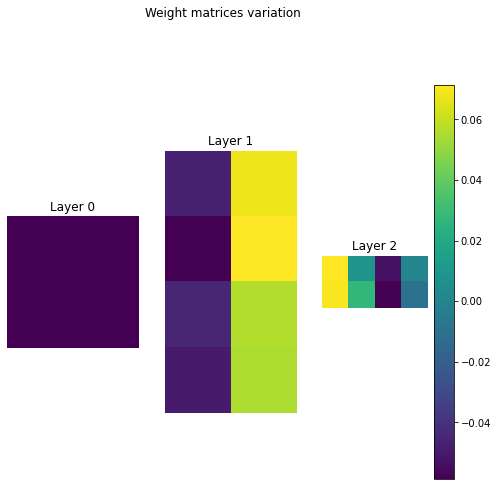

In [18]:
# Plot the variation
plot_delta_weights(wo_layers,w1_layers,bo_layers,b1_layers)


#### Freeze layers of a pre-built model

# **Always Remember freeze before the model is compile **

In [19]:
# Count the trainable and non trainable variables before the freezing

print("\n Before freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                         "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 Before freezing:
	 Number of trainable variables:  4 
	 Number of non trainable variables:  2


In [20]:
# Freeze the second layer

model.layers[1].trainable=False

In [21]:
# Count the trainable and non trainable variables after the freezing

print("\n After freezing:\n\t Number of trainable variables: ", len(model.trainable_variables),
                        "\n\t Number of non trainable variables: ", len(model.non_trainable_variables))


 After freezing:
	 Number of trainable variables:  2 
	 Number of non trainable variables:  4


In [22]:
# Compile and fit the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=50, verbose=False);

In [23]:
# Retrieve weights and biases
# Retrieve weights and biases after training

w2_layers=get_weights(model)
b2_layers=get_biases(model)


Layer 0: bias variation:  0.0
Layer 1: bias variation:  0.0
Layer 2: bias variation:  0.028267456


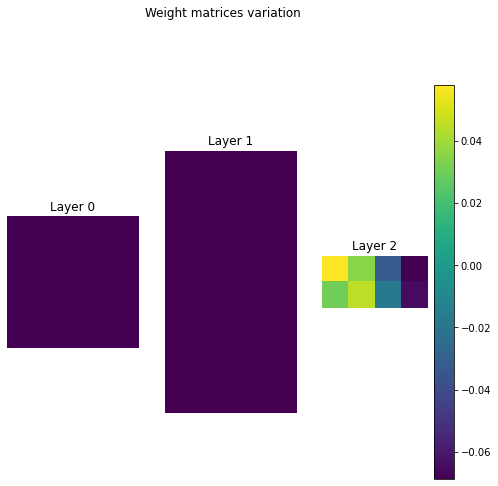

In [24]:
# Plot the variation
plot_delta_weights(w1_layers,w2_layers,b1_layers,b2_layers)


In [25]:
# you can see first two layers are frozen 